In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import sqlite3
from scipy.stats import boxcox
import pickle


In [2]:
df= pd.read_csv('loan_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'loan_data.csv'

In [ ]:
df.shape

(1313, 158)

In [ ]:
df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        27817
Canceled         8425
Refused          7682
Unused offer      778
Name: count, dtype: int64

In [ ]:
df.drop(['REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION'],axis=1,inplace=True)

KeyError: "['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'] not found in axis"

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [ ]:
df.shape

(10802, 158)

In [ ]:
df.isnull().mean()*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               41.524796
DAYS_LAST_DUE_1ST_VERSION    41.524796
DAYS_LAST_DUE                41.524796
DAYS_TERMINATION             41.524796
NFLAG_INSURED_ON_APPROVAL    41.524796
Length: 158, dtype: float64

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,12159.000000,12159.000000,12159.000000,1.215900e+04,1.215900e+04,12159.000000,1.215500e+04,12158.000000,12158.000000,12158.000000,...,42.000000,12158.000000,12158.000000,9348.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,101482.833045,0.079283,0.401349,1.740319e+05,5.996680e+05,27608.152480,5.383668e+05,0.021447,-16238.896282,68184.458957,...,0.795744,-858.517355,293.697648,16.425439,343451.620113,14921.933052,33506.501125,77510.714909,81133.136006,0.333193
std,859.285575,0.270191,0.697764,8.837351e+04,3.804476e+05,13822.781494,3.485808e+05,0.014217,4236.832938,144851.867590,...,0.102334,770.617668,1431.349064,14.796465,86648.728616,74933.722823,106482.334590,150302.208895,152740.034228,0.471388
min,100002.000000,0.000000,0.000000,2.565000e+04,4.797000e+04,2196.000000,4.500000e+04,0.000938,-25059.000000,-15632.000000,...,0.424419,-2922.000000,-1.000000,0.000000,-2922.000000,-2887.000000,-2791.000000,-2854.000000,-2793.000000,0.000000
25%,100730.000000,0.000000,0.000000,1.125000e+05,2.844000e+05,17469.000000,2.475000e+05,0.010147,-19643.500000,-2764.000000,...,0.833113,-1282.000000,-1.000000,6.000000,365243.000000,-1622.750000,-1254.000000,-1318.000000,-1273.750000,0.000000
50%,101490.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25744.500000,4.500000e+05,0.019101,-16096.000000,-1289.000000,...,0.835095,-564.000000,0.000000,12.000000,365243.000000,-824.000000,-347.500000,-528.000000,-491.000000,0.000000
75%,102217.000000,0.000000,1.000000,2.115000e+05,8.100000e+05,35568.000000,6.795000e+05,0.028663,-12805.000000,-296.000000,...,0.852537,-260.000000,84.000000,24.000000,365243.000000,-396.000000,142.000000,-64.000000,-41.000000,1.000000
max,102985.000000,1.000000,4.000000,1.935000e+06,2.517300e+06,135936.000000,2.254500e+06,0.072508,-7705.000000,365243.000000,...,0.867336,-2.000000,74625.000000,72.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


from matplotlib import pyplot as plt
_df_0['SK_ID_CURR'].plot(kind='hist', bins=20, title='SK_ID_CURR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TARGET'].plot(kind='hist', bins=20, title='TARGET')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CNT_CHILDREN'].plot(kind='hist', bins=20, title='CNT_CHILDREN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AMT_INCOME_TOTAL'].plot(kind='hist', bins=20, title='AMT_INCOME_TOTAL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SK_ID_CURR', y='TARGET', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TARGET', y='CNT_CHILDREN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['SK_ID_CURR'].plot(kind='line', figsize=(8, 4), title='SK_ID_CURR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['TARGET'].plot(kind='line', figsize=(8, 4), title='TARGET')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['CNT_CHILDREN'].plot(kind='line', figsize=(8, 4), title='CNT_CHILDREN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AMT_INCOME_TOTAL'].plot(kind='line', figsize=(8, 4), title='AMT_INCOME_TOTAL')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

In [ ]:
df1=pd.DataFrame("")

ValueError: DataFrame constructor not properly called!

In [ ]:
df3=df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE_x','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','SK_ID_PREV','NAME_CONTRACT_TYPE_y','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_DOWN_PAYMENT','NAME_CONTRACT_STATUS']]

In [ ]:
df3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,Laborers,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,Approved
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,Approved
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,Approved
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,Approved
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,Laborers,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,100642,0,Cash loans,F,N,Y,0,157500.0,1350000.0,47056.5,...,Married,House / apartment,NaN,1035042.0,Consumer loans,13695.615,362317.5,362317.5,0.0,Approved
2665,100643,0,Cash loans,F,N,Y,0,90000.0,755190.0,29677.5,...,Separated,House / apartment,NaN,2210624.0,Consumer loans,14274.270,148365.0,131197.5,29700.0,Approved
2666,100644,0,Cash loans,F,Y,Y,2,76500.0,119925.0,13045.5,...,Married,House / apartment,NaN,1781045.0,Consumer loans,NaN,68773.5,68773.5,0.0,Unused offer
2667,100644,0,Cash loans,F,Y,Y,2,76500.0,119925.0,13045.5,...,Married,House / apartment,NaN,2618483.0,Consumer loans,9760.905,47470.5,47470.5,0.0,Approved


In [ ]:
df3['TARGET	'].value_counts()

NameError: name 'df3' is not defined

KeyError: ('NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_STATUS')

In [ ]:
df1['NAME_CONTRACT_TYPE_x']=le.fit_transform(df1['NAME_CONTRACT_TYPE_x'])

<ipython-input-48-b2202b20318e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NAME_CONTRACT_TYPE_x']=le.fit_transform(df1['NAME_CONTRACT_TYPE_x'])


In [ ]:
mydb=sqlite3.connect('loan.db')
cursor= mydb.cursor()
mydb.commit()
indata=df3.to_sql('loans',mydb,index=False ,if_exists='append')
mydb.commit()


NameError: name 'df3' is not defined

In [ ]:
mydb=sqlite3.connect('loan.db')
cursor= mydb.cursor()

NameError: name 'sqlite3' is not defined

In [32]:
mydb=sqlite3.connect('loan.db')
cursor= mydb.cursor()
selectquery="SELECT * FROM loan"
cursor.execute(selectquery)
table=cursor.fetchall()
mydb.commit()
dd3=pd.DataFrame(table,columns=('SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE_x','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','SK_ID_PREV','NAME_CONTRACT_TYPE_y','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_DOWN_PAYMENT','NAME_CONTRACT_STATUS'))

In [33]:
dd3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS
0,100002,1,0,M,N,Y,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,Laborers,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,Approved
1,100003,0,0,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,Approved
2,100003,0,0,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,Approved
3,100003,0,0,F,N,N,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,Core staff,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,Approved
4,100004,0,1,M,Y,Y,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,Laborers,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,102645,0,0,F,Y,Y,0,292500.0,540000.0,36216.0,...,Separated,House / apartment,Core staff,1813282.0,Cash loans,NaN,0.0,0.0,NaN,Canceled
10798,102645,0,0,F,Y,Y,0,292500.0,540000.0,36216.0,...,Separated,House / apartment,Core staff,1587729.0,Cash loans,42634.305,1305000.0,1456587.0,NaN,Refused
10799,102645,0,0,F,Y,Y,0,292500.0,540000.0,36216.0,...,Separated,House / apartment,Core staff,1431584.0,Cash loans,39560.400,742500.0,742500.0,NaN,Approved
10800,102645,0,0,F,Y,Y,0,292500.0,540000.0,36216.0,...,Separated,House / apartment,Core staff,2494619.0,Revolving loans,NaN,0.0,0.0,NaN,Canceled


In [ ]:
dd3['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
1    9860
5     390
2     348
4     103
3      68
0      33
Name: count, dtype: int64

In [ ]:
dd3['AMT_APPLICATION'].isnull().sum()

0

In [ ]:
meanv=dd3['AMT_APPLICATION'].mean()

In [34]:
dd3['AMT_APPLICATION'].fillna(value=175305.8,inplace=True)


In [35]:
dd3['AMT_DOWN_PAYMENT'].fillna(value=6776.4,inplace=True)

In [36]:
dd3['AMT_ANNUITY_y'].fillna(value=16319.8,inplace=True)

In [37]:
dd3['AMT_CREDIT_y'].fillna(value=197875.7,inplace=True)


In [ ]:
dd3['NAME_CONTRACT_TYPE_y'].value_counts()

NAME_CONTRACT_TYPE_y
Cash loans         5005
Consumer loans     4640
Revolving loans    1155
XNA                   2
Name: count, dtype: int64

In [38]:
dd3['NAME_CONTRACT_TYPE_y'].fillna(value='Cash loans',inplace=True)

In [39]:
dd3['CODE_GENDER']=le.fit_transform(dd3['CODE_GENDER'])
dd3['FLAG_OWN_CAR']=le.fit_transform(dd3['FLAG_OWN_CAR'])
dd3['FLAG_OWN_REALTY']=le.fit_transform(dd3['FLAG_OWN_REALTY'])
dd3['NAME_FAMILY_STATUS']=le.fit_transform(dd3['NAME_FAMILY_STATUS'])
dd3['NAME_HOUSING_TYPE']=le.fit_transform(dd3['NAME_HOUSING_TYPE'])
dd3['OCCUPATION_TYPE']=le.fit_transform(dd3['OCCUPATION_TYPE'])
dd3['NAME_EDUCATION_TYPE']=le.fit_transform(dd3['NAME_EDUCATION_TYPE'])
dd3['NAME_INCOME_TYPE']=le.fit_transform(dd3['NAME_INCOME_TYPE'])
dd3['NAME_CONTRACT_TYPE_x']=le.fit_transform(dd3['NAME_CONTRACT_TYPE_x'])
dd3['NAME_CONTRACT_TYPE_y']=le.fit_transform(dd3['NAME_CONTRACT_TYPE_y'])
dd3['NAME_CONTRACT_STATUS']=le.fit_transform(dd3['NAME_CONTRACT_STATUS'])



In [10]:
le=LabelEncoder()

In [ ]:
dd3.fillna(dd3['AMT_INCOME_TOTAL'].mean(), inplace = True)
dd3.fillna(dd3['AMT_CREDIT_x'].mean(), inplace = True)
dd3.fillna(dd3['AMT_ANNUITY_x'].mean(), inplace = True)
dd3.fillna(dd3['AMT_ANNUITY_y'].mean(), inplace = True)
dd3.fillna(dd3['AMT_CREDIT_y'].mean(), inplace = True)
dd3.fillna(dd3['AMT_APPLICATION'].mean(), inplace = True)
dd3.fillna(dd3['AMT_APPLICATION'].mean(), inplace = True)









In [ ]:
dd3.drop(['NAME_HOUSING_TYPE'],axis=1,inplace=True)

In [ ]:
dd3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AMT_APPLICATION,AMT_DOWN_PAYMENT
0,100002,1,0,1,0,202500.0,3,4,3,1,1.790550e+05,0.000000
1,100003,0,0,0,0,270000.0,2,1,1,1,9.000000e+05,174026.769733
2,100003,0,0,0,0,270000.0,2,1,1,1,3.375000e+05,0.000000
3,100003,0,0,0,0,270000.0,2,1,1,1,6.880950e+04,6885.000000
4,100004,0,1,1,0,67500.0,3,4,3,1,2.428200e+04,4860.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10797,102645,0,0,0,0,292500.0,2,1,2,1,0.000000e+00,174026.769733
10798,102645,0,0,0,0,292500.0,2,1,2,1,1.305000e+06,174026.769733
10799,102645,0,0,0,0,292500.0,2,1,2,1,7.425000e+05,174026.769733
10800,102645,0,0,0,0,292500.0,2,1,2,1,0.000000e+00,174026.769733


In [ ]:
dd3.drop(['NAME_EDUCATION_TYPE'],axis=1,inplace=True)


In [ ]:
dd3

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,AMT_APPLICATION,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,3,4,3,1,8,1.790550e+05,0.000000,0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,2,1,1,1,3,9.000000e+05,174026.769733,0
2,0,0,0,0,0,0,270000.0,1293502.5,35698.5,2,1,1,1,3,3.375000e+05,0.000000,0
3,0,0,0,0,0,0,270000.0,1293502.5,35698.5,2,1,1,1,3,6.880950e+04,6885.000000,0
4,0,1,1,1,1,0,67500.0,135000.0,6750.0,3,4,3,1,8,2.428200e+04,4860.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,0,0,0,1,1,0,292500.0,540000.0,36216.0,2,1,2,1,3,0.000000e+00,174026.769733,1
10798,0,0,0,1,1,0,292500.0,540000.0,36216.0,2,1,2,1,3,1.305000e+06,174026.769733,2
10799,0,0,0,1,1,0,292500.0,540000.0,36216.0,2,1,2,1,3,7.425000e+05,174026.769733,0
10800,0,0,0,1,1,0,292500.0,540000.0,36216.0,2,1,2,1,3,0.000000e+00,174026.769733,1


In [ ]:
dd3_corr=dd3.corr()

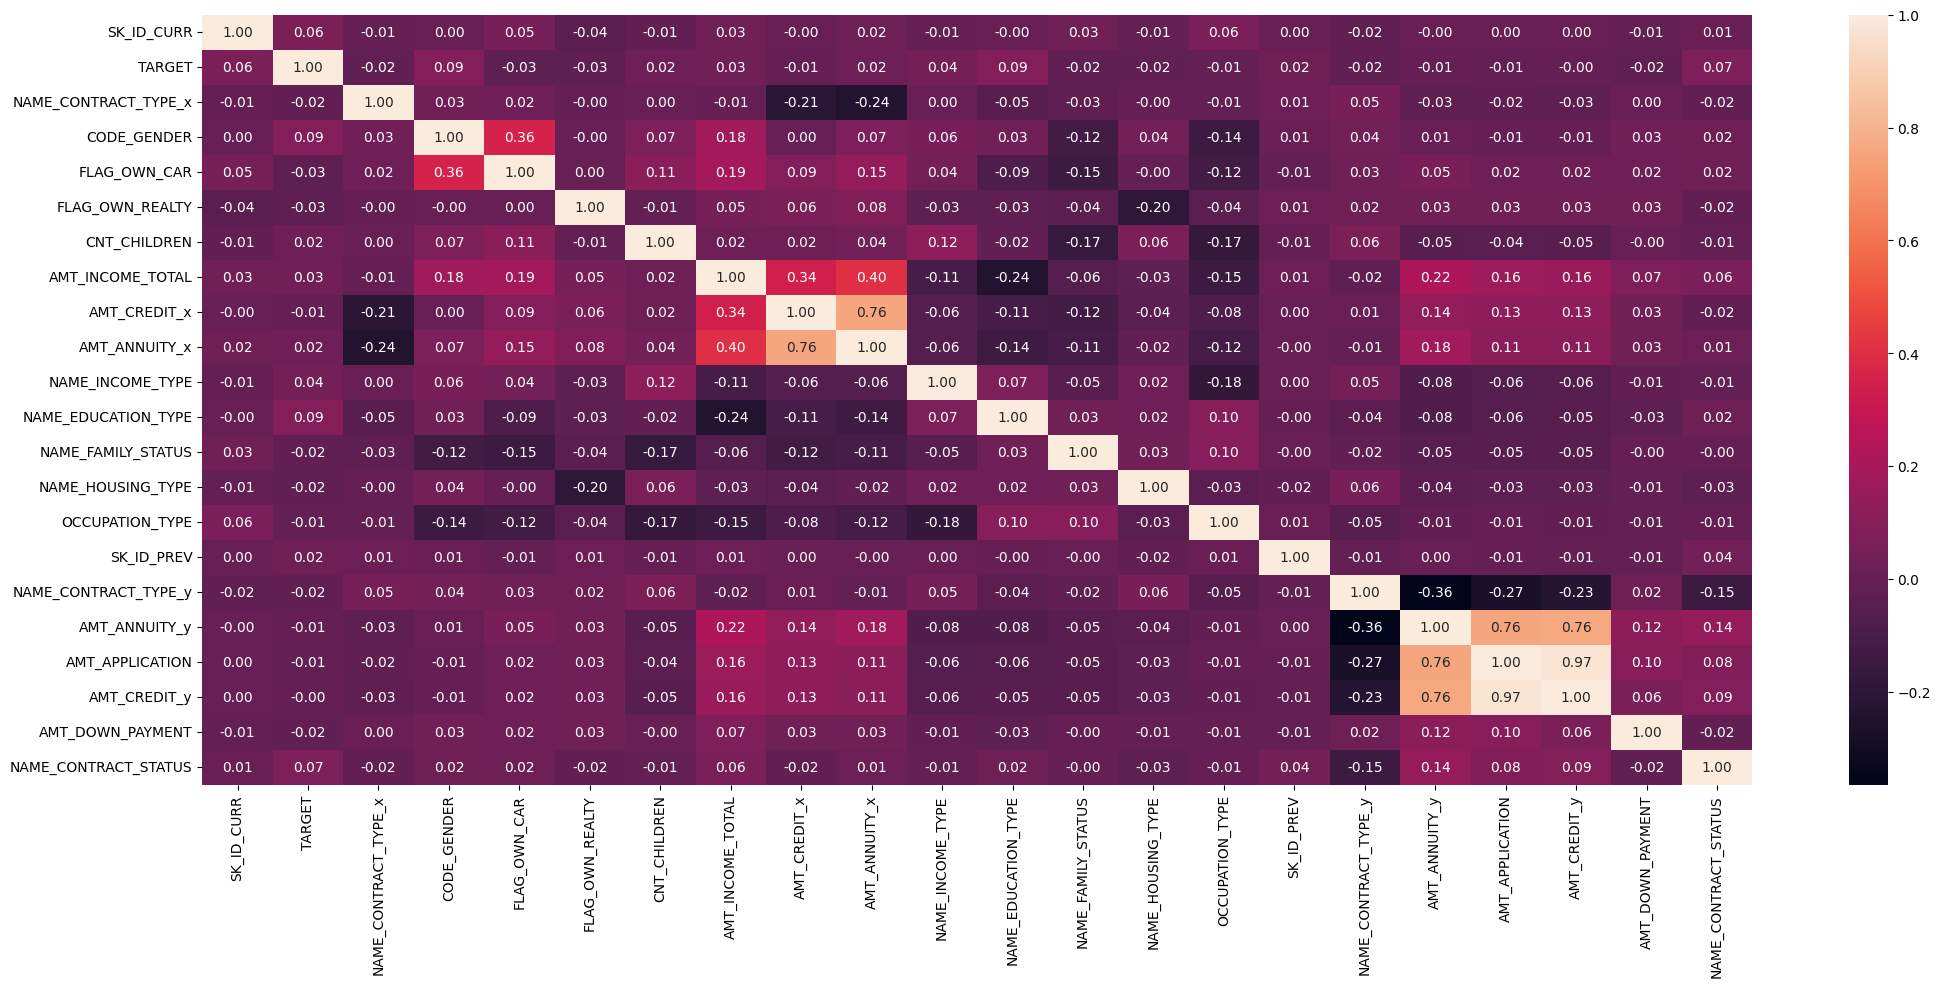

In [ ]:
plt.figure(figsize=(25,10))
nn=sns.heatmap(dd3_corr,annot=True,fmt='.2f')



In [ ]:
dd3.drop(['SK_ID_CURR','NAME_CONTRACT_TYPE_x','AMT_ANNUITY_y','AMT_CREDIT_y','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FLAG_OWN_REALTY','AMT_ANNUITY_x','NAME_CONTRACT_STATUS'],axis=1,inplace=True)


In [ ]:
dd3.dropna(inplace=True)

In [ ]:
dd3.drop(dd3[dd3['NAME_CONTRACT_STATUS']==2].index,inplace=True)

In [ ]:
dd3.drop(dd3[dd3['NAME_CONTRACT_STATUS']==3].index,inplace=True)

In [ ]:
dd3.drop(dd3[dd3['NAME_CONTRACT_STATUS']==4].index,inplace=True)

In [ ]:
dd3.drop(dd3[dd3['NAME_CONTRACT_STATUS']==5].index,inplace=True)

In [ ]:
dd3['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
0    6602
1    2016
Name: count, dtype: int64

In [ ]:
dd3

,TARGET,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_DOWN_PAYMENT
0,1,1,0,0,202500.0,406597.5,3,1,8,1038818.0,1,179055.0,0.0
1,0,0,0,0,270000.0,1293502.5,1,1,3,1810518.0,0,900000.0,6776.4
2,0,0,0,0,270000.0,1293502.5,1,1,3,2636178.0,1,337500.0,0.0
3,0,0,0,0,270000.0,1293502.5,1,1,3,2396755.0,1,68809.5,6885.0
4,0,1,1,0,67500.0,135000.0,3,1,8,1564014.0,1,24282.0,4860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,0,0,1,0,292500.0,540000.0,2,1,3,1813282.0,0,0.0,6776.4
10798,0,0,1,0,292500.0,540000.0,2,1,3,1587729.0,0,1305000.0,6776.4
10799,0,0,1,0,292500.0,540000.0,2,1,3,1431584.0,0,742500.0,6776.4
10800,0,0,1,0,292500.0,540000.0,2,1,3,2494619.0,2,0.0,6776.4


In [ ]:
dd3.fillna(value=0,inplace=True)

In [ ]:
values=dd3.drop(['TARGET'],axis=1)

In [ ]:
tar=dd3['TARGET']

In [ ]:
train_data,test_data,train_lab,test_lab=train_test_split(values,tar,test_size=0.2,random_state=42)

In [ ]:
train_data.shape

(8640, 12)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
clf = DecisionTreeClassifier(random_state=42)


In [ ]:
clf.fit(train_data, train_lab)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(test_data)


In [ ]:
accuracy = accuracy_score(test_data, y_pred)
report = classification_report(test_data, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(train_data,train_lab)

In [ ]:
pred_train=model.predict(train_data)

In [ ]:
accuracy_score(train_lab,pred_train)*100

92.46614975118621

In [ ]:
recall_score(train_lab,pred_train)*100

0.0

In [ ]:
f1_score(train_lab,pred_train)*100

0.0

In [ ]:
roc_auc_score(train_lab,pred_train)*100

50.0

In [ ]:
pred_test=model.predict(test_data)

In [ ]:
accuracy_score(test_lab,pred_test)*100

92.64229523368812

In [ ]:
recall_score(test_lab,pred_test)*100

0.0

In [ ]:
f1_score(test_lab,pred_test)*100

0.0

In [ ]:
roc_auc_score(test_lab,pred_test)*100

50.0

In [ ]:
model1=RandomForestClassifier()

In [ ]:
model1.fit(train_data,train_lab)

RandomForestClassifier()

In [ ]:
pred_train1=model1.predict(train_data)

In [ ]:
accuracy_score(train_lab,pred_train1)*100

100.0

In [ ]:
recall_score(train_lab,pred_train1)*100

100.0

In [ ]:
f1_score(train_lab,pred_train1)*100

100.0

In [ ]:
roc_auc_score(train_lab,pred_train1)*100

100.0

In [ ]:
pred_test1=model1.predict(test_data)

In [ ]:
accuracy_score(test_lab,pred_test1)*100

95.7889865802869

In [ ]:
recall_score(test_lab,pred_test1)*100

44.0251572327044

In [ ]:
f1_score(test_lab,pred_test1)*100

60.60606060606061

In [ ]:
roc_auc_score(test_lab,pred_test1)*100

71.96262856640215

In [ ]:
dd3['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
0    6602
1    2016
2    1987
3     196
4       1
Name: count, dtype: int64

In [ ]:
dd3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,3,1,7,1.038818e+06,1,9251.775000,179055.000000,1.790550e+05,0.000000,0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1,1,3,1.810518e+06,0,98356.995000,900000.000000,1.035882e+06,176240.777877,0
2,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1,1,3,2.636178e+06,1,64567.665000,337500.000000,3.486375e+05,0.000000,0
3,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,1,1,3,2.396755e+06,1,6737.310000,68809.500000,6.805350e+04,6885.000000,0
4,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,3,1,7,1.564014e+06,1,5357.250000,24282.000000,2.010600e+04,4860.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,100642,0,0,0,0,1,0,157500.0,1350000.0,47056.5,...,1,1,17,1.035042e+06,1,13695.615000,362317.500000,3.623175e+05,0.000000,0
2665,100643,0,0,0,0,1,0,90000.0,755190.0,29677.5,...,2,1,17,2.210624e+06,1,14274.270000,148365.000000,1.311975e+05,29700.000000,0
2666,100644,0,0,0,1,1,2,76500.0,119925.0,13045.5,...,1,1,17,1.781045e+06,1,176240.777877,68773.500000,6.877350e+04,0.000000,3
2667,100644,0,0,0,1,1,2,76500.0,119925.0,13045.5,...,1,1,17,2.618483e+06,1,9760.905000,47470.500000,4.747050e+04,0.000000,0


In [ ]:
le=LabelEncoder()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#oversampleversion

In [41]:
values1=dd3.drop(['TARGET'],axis=1)

In [ ]:
values1

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,AMT_APPLICATION,AMT_DOWN_PAYMENT
0,100002,0,1,0,202500.0,3,3,1.790550e+05,0.000000
1,100003,0,0,0,270000.0,2,1,9.000000e+05,174026.769733
2,100003,0,0,0,270000.0,2,1,3.375000e+05,0.000000
3,100003,0,0,0,270000.0,2,1,6.880950e+04,6885.000000
4,100004,1,1,0,67500.0,3,3,2.428200e+04,4860.000000
...,...,...,...,...,...,...,...,...,...
10797,102645,0,0,0,292500.0,2,2,0.000000e+00,174026.769733
10798,102645,0,0,0,292500.0,2,2,1.305000e+06,174026.769733
10799,102645,0,0,0,292500.0,2,2,7.425000e+05,174026.769733
10800,102645,0,0,0,292500.0,2,2,0.000000e+00,174026.769733


In [40]:
dd3.dropna(inplace=True)

In [42]:
values2=dd3['TARGET']

In [43]:
ro=RandomOverSampler(random_state=42)

In [44]:
resample_values,resample_tar=ro.fit_resample(values1,values2)

In [ ]:
resample_tar.value_counts()

TARGET
1    9991
0    9991
Name: count, dtype: int64

In [45]:
train_data2,test_data2,train_lab2,test_lab2=train_test_split(resample_values,resample_tar,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
model1=RandomForestClassifier(random_state=45,max_depth=15,criterion='entropy')

In [47]:
model1.fit(train_data2,train_lab2)

RandomForestClassifier(criterion='entropy', max_depth=15, random_state=45)

In [48]:
ta_pred=model1.predict(train_data2)

In [49]:
accuracy_score(train_lab2,ta_pred)*100

99.94995308101345

In [50]:
recall_score(train_lab2,ta_pred)*100

99.91237952184252

In [51]:
f1_score(train_lab2,ta_pred)*100

99.94991234660657

In [52]:
tt_pred=model1.predict(test_data2)

In [53]:
accuracy_score(test_lab2,tt_pred)*100

99.84988741556167

In [54]:
recall_score(test_lab2,tt_pred)*100

99.75024975024975

In [55]:
f1_score(test_lab2,tt_pred)*100

99.85

In [ ]:
dt = {
    'Model Name': ['LogisticRegression', 'Decision Tree', 'RandomForest'],
    'accuracy_score': [53.01, 93.69, 99.84],
    'recall_score': [60.34,94.64,99.75,],
    'f1_score': [54.04,93.70,99.85,]
}

pf = pd.DataFrame(dt)
st.dataframe(pf)


In [ ]:
dt_model=DecisionTreeClassifier(random_state=45,max_depth=15,criterion='entropy')

In [ ]:
dt_model.fit(train_data2,train_lab2)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=45)

In [ ]:
tr_pred=dt_model.predict(train_data2)

In [ ]:
accuracy_score(train_lab2,tr_pred)*100

93.86925242414765

In [ ]:
recall_score(train_lab2,tr_pred)*100

94.14194517461509

In [ ]:
f1_score(train_lab2,tr_pred)*100

93.88341031082261

In [ ]:
ts_pred=dt_model.predict(test_data2)

In [ ]:
accuracy_score(test_lab2,ts_pred)*100

93.6952714535902

In [ ]:
recall_score(test_lab2,ts_pred)*100

94.7052947052947

In [ ]:
f1_score(test_lab2,ts_pred)*100

93.76854599406528

In [ ]:
pickle.dump(dt_model,open('/content/DTmodel21.pkl','wb'))

In [ ]:
pd.DataFrame({
    'col':train_data2.columns,
    'score':dt_model.feature_importances_
}).sort_values('score',ascending=False)



,col,score
4,AMT_CREDIT_x,0.346847
3,AMT_INCOME_TOTAL,0.242675
7,OCCUPATION_TYPE,0.134153
5,NAME_FAMILY_STATUS,0.059860
2,CNT_CHILDREN,0.056423
1,FLAG_OWN_CAR,0.052681
11,AMT_DOWN_PAYMENT,0.032624
10,AMT_APPLICATION,0.030561
0,CODE_GENDER,0.019958
8,SK_ID_PREV,0.016882


In [ ]:
remodel23=LogisticRegression()

In [ ]:
remodel23.fit(train_data2,train_lab2)

LogisticRegression()

In [ ]:
repred_train=remodel23.predict(train_data2)

In [ ]:
accuracy_score(train_lab2,repred_train)*100

53.018077187715015

In [ ]:
recall_score(train_lab2,repred_train)*100

60.95202210499875

In [ ]:
f1_score(train_lab2,repred_train)*100

56.37451356217692

In [ ]:
retest_data=remodel23.predict(test_data2)

In [ ]:
accuracy_score(test_lab2,retest_data)*100

51.6887665749312

In [ ]:
recall_score(test_lab2,retest_data)*100

60.0

In [ ]:
f1_score(test_lab2,retest_data)*100

55.782001373940915

In [ ]:
roc_auc_score(test_lab2,retest_data)*100

51.5556685307575

In [ ]:
retest_data

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
remodel23.predict_proba(test_data2)

array([[0.54206077, 0.45793923],
       [0.55221472, 0.44778528],
       [0.45634284, 0.54365716],
       ...,
       [0.46194946, 0.53805054],
       [0.51486129, 0.48513871],
       [0.55067594, 0.44932406]])

In [ ]:
pd.DataFrame({
    'col':train_data2.columns,
    'score':remodel21.feature_importances_
}).sort_values('score',ascending=False)



,col,score
4,AMT_CREDIT_x,0.264629
3,AMT_INCOME_TOTAL,0.198458
7,OCCUPATION_TYPE,0.119908
8,SK_ID_PREV,0.077444
10,AMT_APPLICATION,0.071827
5,NAME_FAMILY_STATUS,0.061691
2,CNT_CHILDREN,0.050882
11,AMT_DOWN_PAYMENT,0.045956
1,FLAG_OWN_CAR,0.038072
0,CODE_GENDER,0.032759


In [ ]:
remodel21=RandomForestClassifier()

In [ ]:
remodel21.fit(train_data2,train_lab2)

RandomForestClassifier()

In [ ]:
ptran=remodel21.predict(train_data2)

In [ ]:
accuracy_score(train_lab2,ptran)*100

100.0

In [ ]:
recall_score(train_lab2,ptran)*100

100.0

In [ ]:
f1_score(train_lab2,ptran)*100

100.0

In [ ]:
roc_auc_score(train_lab2,ptran)*100

100.0

In [ ]:
ptest=remodel21.predict(test_data2)

In [ ]:
accuracy_score(test_lab2,ptest)*100

99.89992494370779

In [ ]:
recall_score(test_lab2,ptest)*100

100.0

In [ ]:
f1_score(test_lab2,ptest)*100

99.9001996007984

In [ ]:
roc_auc_score(test_lab2,ptest)*100

99.89974937343358

In [ ]:
pickle.dump(remodel21,open('/content/RandomFmodel21.pkl','wb'))

In [ ]:
pickle.dump(remodel1,open('/content/LRmodel.pkl','wb'))

In [ ]:
values1

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_DOWN_PAYMENT
0,1,0,0,202500.0,406597.5,3,1,8,1038818.0,1,179055.0,0.0
1,0,0,0,270000.0,1293502.5,1,1,3,1810518.0,0,900000.0,6776.4
2,0,0,0,270000.0,1293502.5,1,1,3,2636178.0,1,337500.0,0.0
3,0,0,0,270000.0,1293502.5,1,1,3,2396755.0,1,68809.5,6885.0
4,1,1,0,67500.0,135000.0,3,1,8,1564014.0,1,24282.0,4860.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10797,0,1,0,292500.0,540000.0,2,1,3,1813282.0,0,0.0,6776.4
10798,0,1,0,292500.0,540000.0,2,1,3,1587729.0,0,1305000.0,6776.4
10799,0,1,0,292500.0,540000.0,2,1,3,1431584.0,0,742500.0,6776.4
10800,0,1,0,292500.0,540000.0,2,1,3,2494619.0,2,0.0,6776.4


In [61]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [62]:
!pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 5.5 MB/s eta 0:00:00


In [63]:
!wget -q -O  - ipv4.icanhazip.com

34.168.246.78


In [70]:
! streamlit run final.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.246.78:8501

npx: installed 22 in 2.347s
your url is: https://evil-zebras-check.loca.lt
2024-07-09 20:54:15.634583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 20:54:15.634649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 20:54:15.636141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 20:54:17.310680: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [ ]:
values1

,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_DOWN_PAYMENT
0,1,0,0,202500.0,406597.5,3,1,8,1038818.0,1,179055.0,0.0
1,0,0,0,270000.0,1293502.5,1,1,3,1810518.0,0,900000.0,6776.4
2,0,0,0,270000.0,1293502.5,1,1,3,2636178.0,1,337500.0,0.0
3,0,0,0,270000.0,1293502.5,1,1,3,2396755.0,1,68809.5,6885.0
4,1,1,0,67500.0,135000.0,3,1,8,1564014.0,1,24282.0,4860.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10797,0,1,0,292500.0,540000.0,2,1,3,1813282.0,0,0.0,6776.4
10798,0,1,0,292500.0,540000.0,2,1,3,1587729.0,0,1305000.0,6776.4
10799,0,1,0,292500.0,540000.0,2,1,3,1431584.0,0,742500.0,6776.4
10800,0,1,0,292500.0,540000.0,2,1,3,2494619.0,2,0.0,6776.4


In [69]:
%%writefile final.py
# Import necessary libraries
import pandas as pd
import numpy as np
import pickle
import streamlit as st
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from streamlit_option_menu import option_menu
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your trained model
model = pickle.load(open('/content/DTmodel21.pkl', 'rb'))

# Initialize LabelEncoders
label_encoder_gender = LabelEncoder()
label_encoder_contract_type = LabelEncoder()
label_encoder_family = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_car = LabelEncoder()
label_encoder_housetype = LabelEncoder()

# Define possible values for label encoders
gender_values = ['Male', 'Female']
contract_type_values = ['Cash', 'Revolving']
family_status_values = ['Married', 'Single']
occupation_values = ['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
                     'Sales staff', 'Cleaning staff', 'Cooking staff', 'Security staff',
                     'Medicine staff', 'High skill tech staff', 'Private service staff',
                     'Low skill tech staff', 'Waiters/barmen staff', 'Realty agents',
                     'Secretaries', 'IT staff', 'HR staff']
car_values = ['Yes', 'No']
housetype_values = ['House / apartment', 'With parents', 'Municipal apartment',
                    'Rented apartment', 'Office apartment', 'Co-op apartment']

# Fit label encoders with possible values
label_encoder_gender.fit(gender_values)
label_encoder_contract_type.fit(contract_type_values)
label_encoder_family.fit(family_status_values)
label_encoder_occupation.fit(occupation_values)
label_encoder_car.fit(car_values)
label_encoder_housetype.fit(housetype_values)

st.set_page_config(layout='wide')

with st.sidebar:
    select = option_menu('Main Menu', ['Home','EDA Report','Prediction', 'Recommendation System'])

if select == 'Home':
    st.subheader('MODEL PERFORMANCE')
    dt = {
    'Model Name': ['LogisticRegression', 'Decision Tree', 'RandomForest'],
    'accuracy_score': [53.01, 93.69, 99.84],
    'recall_score': [60.34,94.64,99.75,],
    'f1_score': [54.04,93.70,99.85,]
      }

    pf = pd.DataFrame(dt)
    st.dataframe(pf)
    st.write('I prefer to use Decision Tree model in Bank risk controller systems')

if select=='EDA Report':

      # Load data
      conn = sqlite3.connect('loan.db')
      df = pd.read_sql_query("SELECT * FROM loan;", conn)
      conn.close()

      # Title of the app
      st.title('Exploratory Data Analysis of Loan Data')

      # Distplot for AMT_CREDIT_x
      st.header('Distribution of Loan Amounts (AMT_CREDIT_x)')
      fig1, ax1 = plt.subplots(figsize=(10, 6))
      sns.histplot(df['AMT_CREDIT_x'], kde=True, bins=30, ax=ax1)
      ax1.set_title('Distribution of Loan Amounts')
      ax1.set_xlabel('Loan Amount (AMT_CREDIT_x)')
      ax1.set_ylabel('Frequency')
      ax1.grid(True)
      st.pyplot(fig1)


      # Distplot for AMT_CREDIT_x
      st.header('Distribution of Loan Amounts (AMT_CREDIT_x)')
      fig2, ax2 = plt.subplots(figsize=(10, 6))
      sns.histplot(df['AMT_CREDIT_x'], kde=True, bins=30, ax=ax2)
      ax2.set_title('Distribution of Loan Amounts')
      ax2.set_xlabel('Loan Amount (AMT_CREDIT_x)')
      ax2.set_ylabel('Frequency')
      ax2.grid(True)
      st.pyplot(fig2)


      pca_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'CNT_CHILDREN']
      df_pca = df[pca_cols].dropna()

      # Standardize the data
      scaler = StandardScaler()
      df_pca_scaled = scaler.fit_transform(df_pca)

      # Apply PCA
      pca = PCA(n_components=2)
      pca_result = pca.fit_transform(df_pca_scaled)

      # Create a DataFrame with the PCA results
      pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
      pca_df['TARGET'] = df['TARGET'].iloc[df_pca.index].values

      # Plot PCA results
      st.header('Dimensionality Reduction: PCA')
      fig3, ax3 = plt.subplots(figsize=(10, 6))
      sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='TARGET', alpha=0.7, ax=ax3)
      ax3.set_title('PCA of Loan Data')
      ax3.set_xlabel('Principal Component 1')
      ax3.set_ylabel('Principal Component 2')
      ax3.grid(True)
      st.pyplot(fig3)



      pairplot_cols = ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'CNT_CHILDREN', 'CODE_GENDER']
      df_pairplot = df[pairplot_cols]

      # Convert CODE_GENDER to numeric for the pair plot
      df_pairplot['CODE_GENDER'] = df_pairplot['CODE_GENDER'].map({'M': 0, 'F': 1})

      st.header('Multivariate Visualization: Pair Plot')
      fig4=sns.pairplot(df_pairplot, hue='TARGET', palette='Set2', diag_kind='kde', plot_kws={'alpha': 0.7})
      st.pyplot(fig4)




      st.header('Bivariate Visualization: Loan Amount vs Income')
      fig, ax = plt.subplots(figsize=(10, 6))
      sns.scatterplot(data=df, x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', hue='TARGET', alpha=0.7, ax=ax)
      ax.set_title('Loan Amount vs Income')
      ax.set_xlabel('Income (AMT_INCOME_TOTAL)')
      ax.set_ylabel('Loan Amount (AMT_CREDIT_x)')
      ax.grid(True)
      st.pyplot(fig)



      st.header('Univariate Visualization: Distribution of Loan Amounts')
      fig, ax = plt.subplots(figsize=(10, 6))
      sns.histplot(df['AMT_CREDIT_x'], kde=True, bins=30, ax=ax)
      ax.set_title('Distribution of Loan Amounts')
      ax.set_xlabel('Loan Amount (AMT_CREDIT_x)')
      ax.set_ylabel('Frequency')
      ax.grid(True)
      st.pyplot(fig)



if select == 'Prediction':
    st.title('Bank Risk Controller Systems :money_with_wings:')

    col1, col2 = st.columns(2)
    with st.form('prediction form'):
        # Customer Details column
        with col1:
            st.header('Customer Details')
            ID_PREV = st.number_input('Previous Customer ID', min_value=0, max_value=999999999, step=1, value=0)
            gender = st.selectbox('Gender', gender_values)
            family = st.selectbox('Family Status', family_status_values)
            children = st.number_input('Number of Children', min_value=0, max_value=10, step=1, value=0)
            occupation = st.selectbox('Occupation Type', occupation_values)
            own_car = st.selectbox('Own Car', car_values)
            housetype = st.selectbox('House Type', housetype_values)

        # Loan Details column
        with col2:
            st.header('Loan Details')
            contract_type = st.selectbox('Contract Type', contract_type_values)
            income = st.number_input('Annual Income', min_value=0.0, max_value=10000000.0, step=1000.0, value=0.0)
            application = st.number_input('Application Amount', min_value=0.0, max_value=10000000.0, step=1000.0, value=0.0)
            downpayment = st.number_input('Down Payment', min_value=0.0, max_value=10000000.0, step=1000.0, value=0.0)
            credit = st.number_input('Credit Amount', min_value=0.0, max_value=10000000.0, step=1000.0, value=0.0)

        # Function to make predictions
        def predicts():

            gender_encoded = label_encoder_gender.transform([gender])[0]
            contract_type_encoded = label_encoder_contract_type.transform([contract_type])[0]
            family_encoded = label_encoder_family.transform([family])[0]
            occupation_encoded = label_encoder_occupation.transform([occupation])[0]
            car_encoded = label_encoder_car.transform([own_car])[0]
            housetype_encoded = label_encoder_housetype.transform([housetype])[0]


            user_input = {
                'CODE_GENDER': gender_encoded,
                'FLAG_OWN_CAR': car_encoded,
                'CNT_CHILDREN': children,
                'AMT_INCOME_TOTAL': income,
                'AMT_CREDIT_x': credit,
                'NAME_FAMILY_STATUS': family_encoded,
                'NAME_HOUSING_TYPE': housetype_encoded,
                'OCCUPATION_TYPE': occupation_encoded,
                'SK_ID_PREV': ID_PREV,
                'NAME_CONTRACT_TYPE_y': contract_type_encoded,
                'AMT_APPLICATION': application,
                'AMT_DOWN_PAYMENT': downpayment,

            }
            x = pd.DataFrame(user_input, index=[0])
            prediction = model.predict(x)




            ok= st.write(f"Prediction: {'Default' if prediction[0] == 1 else 'No Default'}")
            return ok



        # Button to trigger prediction
        st.form_submit_button('Predict', on_click=predicts)

if select == 'Recommendation System':
    file_path = 'Anonymized_Service_Use.xlsx'
    data = pd.read_excel(file_path)

    # Load the model and encoders
    model = load_model('recommendation_model_with_revenue.h5')
    with open('encoders_with_revenue.pkl', 'rb') as f:
        user_enc, service_enc, revenue_enc = pickle.load(f)

    # Streamlit app layout
    st.title("Service Recommendation System")

    # User inputs
    domain_list = data['Domain'].unique().tolist()
    selected_domain = st.selectbox("Select a Domain", domain_list)

    customer_list = data['Customer'].unique().tolist()
    selected_customer = st.selectbox("Select a Customer", customer_list)

    revenue_list = data['Customer Size Revenue'].unique().tolist()
    selected_revenue = st.selectbox("Select Customer Size Revenue", revenue_list)

    package_list = data['Package'].unique().tolist()
    selected_packages = st.multiselect("Select Packages", package_list)

    # Button to generate recommendations
    if st.button("Recommend Services"):
        # Encode user input
        customer_id = user_enc.transform([selected_customer])[0]
        revenue_id = revenue_enc.transform([selected_revenue])[0]


        filtered_data = data[(data['Domain'] == selected_domain) & (data['Package'].isin(selected_packages))]

        if not filtered_data.empty:

            service_ids = service_enc.transform(filtered_data['Service'].values)
            user_ids = np.full(len(service_ids), customer_id)
            revenue_ids = np.full(len(service_ids), revenue_id)


            predictions = model.predict([user_ids, service_ids, revenue_ids])
            predictions = predictions.flatten()


            top_service_indices = predictions.argsort()[-20:][::-1]
            top_services = service_enc.inverse_transform(service_ids[top_service_indices])


            unique_recommended_services = set()
            for service in top_services:
                unique_recommended_services.add(service)

            # Display recommendations
            st.write(f"Top service recommendations for {selected_customer} in {selected_domain} with revenue {selected_revenue} and packages {selected_packages}:")
            for i, service in enumerate(unique_recommended_services, 1):
                st.write(f"{i}. {service}")
        else:
            st.write("No services available for the selected domain and packages.")




Overwriting final.py


In [ ]:
data = pd.read_excel('/content/Anonymized_Service_Use.xlsx')


In [ ]:
data

,Customer,Service,Domain,Package,Customer Region,Customer Size Revenue,Customer Size Employees,Likelihood to Recommend Score
0,Customer 1,Service 1,Consultations,Organizational Performance,California,14M-36M,300-500,9
1,Customer 1,Service 2,Consultations,Organizational Performance,California,14M-36M,300-500,10
2,Customer 2,Service 2,Consultations,Organizational Performance,Appalachia,14M-36M,Less than 300,10
3,Customer 3,Service 3,Vendors and Discounts,Brand Activation,Midwest,14M-36M,300-500,7
4,Customer 4,Service 3,Vendors and Discounts,Brand Activation,Southeast,Greater than 111M,Greater than 1300,8
...,...,...,...,...,...,...,...,...
3567,Customer 48,Service 81,Affinity Groups,Mission Advancement,Pacific Northwest,61M-111M,800-1300,4
3568,Customer 109,Service 81,Affinity Groups,Mission Advancement,Midwest,14M-36M,300-500,3
3569,Customer 143,Service 81,Affinity Groups,Mission Advancement,Southwest,36M-61M,500-800,1
3570,Customer 144,Service 81,Affinity Groups,Mission Advancement,Southeast,14M-36M,Less than 300,9


In [71]:
data['Package'].isnull().sum()
data['Domain'].isnull().sum()
data['Customer'].isnull().sum()
data['Service'].isnull().sum()

0

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle


In [ ]:
file_path = 'Anonymized_Service_Use.xlsx'
data = pd.read_excel(file_path)

In [ ]:
user_enc = LabelEncoder()
data['Customer'] = user_enc.fit_transform(data['Customer'].values)

service_enc = LabelEncoder()
data['Service'] = service_enc.fit_transform(data['Service'].values)

revenue_enc = LabelEncoder()
data['Customer Size Revenue'] = revenue_enc.fit_transform(data['Customer Size Revenue'].values)

In [ ]:
num_users = data['Customer'].nunique()
num_services = data['Service'].nunique()
num_revenues = data['Customer Size Revenue'].nunique()

In [ ]:
train_indices = np.random.rand(len(data)) < 0.8
train_data = data[train_indices]
test_data = data[~train_indices]

In [ ]:
embedding_size = 50


In [ ]:
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(num_users, embedding_size, name='user_embedding')(user_input)
user_vector = Flatten(name='user_flatten')(user_embedding)

service_input = Input(shape=(1,), name='service_input')
service_embedding = Embedding(num_services, embedding_size, name='service_embedding')(service_input)
service_vector = Flatten(name='service_flatten')(service_embedding)

revenue_input = Input(shape=(1,), name='revenue_input')
revenue_embedding = Embedding(num_revenues, embedding_size, name='revenue_embedding')(revenue_input)
revenue_vector = Flatten(name='revenue_flatten')(revenue_embedding)

In [ ]:
concatenated = Concatenate()([user_vector, service_vector, revenue_vector])

dense_1 = Dense(128, activation='relu')(concatenated)
output = Dense(1, activation='linear', name='output')(dense_1)

In [ ]:
model = Model(inputs=[user_input, service_input, revenue_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit([train_data['Customer'], train_data['Service'], train_data['Customer Size Revenue']],
                    train_data['Likelihood to Recommend Score'],
                    validation_data=([test_data['Customer'], test_data['Service'], test_data['Customer Size Revenue']],
                                     test_data['Likelihood to Recommend Score']),
                    epochs=10, verbose=1)

In [ ]:
model.save('recommendation_model_with_revenue.h5')
with open('encoders_with_revenue.pkl', 'wb') as f:
    pickle.dump((user_enc, service_enc, revenue_enc), f)